<a href="https://colab.research.google.com/github/vidhi015/Face-Mask-Detection/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK_4: Detection of Face Mask**

### **1. The Setup phase**

In [1]:
import pandas as pd                               
import numpy as np                                
import tensorflow as tf                           
from tensorflow import keras                      
from tensorflow.keras.models import Sequential    
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D,Dropout 
from tensorflow.keras.optimizers import Adam     
from keras.preprocessing import image            
from keras.preprocessing.image import ImageDataGenerator  
import matplotlib.pyplot as plt                  
from google.colab import files                   

In [2]:
uploaded = files.upload()

Saving data.zip to data.zip


In [3]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/without/01002_Mask_Mouth_Chin.jpg  
  inflating: data/without/01003_Mask_Mouth_Chin.jpg  
  inflating: data/without/01004_Mask_Mouth_Chin.jpg  
  inflating: data/without/01005_Mask_Mouth_Chin.jpg  
  inflating: data/without/01006_Mask_Mouth_Chin.jpg  
  inflating: data/without/01007_Mask_Mouth_Chin.jpg  
  inflating: data/without/01008_Mask_Mouth_Chin.jpg  
  inflating: data/without/01009_Mask_Mouth_Chin.jpg  
  inflating: data/without/01010_Mask_Mouth_Chin.jpg  
  inflating: data/without/01011_Mask_Mouth_Chin.jpg  
  inflating: data/without/01012_Mask_Mouth_Chin.jpg  
  inflating: data/without/01013_Mask_Mouth_Chin.jpg  
  inflating: data/without/01014_Mask_Mouth_Chin.jpg  
  inflating: data/without/01015_Mask_Chin.jpg  
  inflating: data/without/01016_Mask_Mouth_Chin.jpg  
  inflating: data/without/01017_Mask_Mouth_Chin.jpg  
  inflating: data/without/01018_Mask_Mouth_Chin.jpg  
  inflating: data/without/01019_Mask_

In [4]:
!rm data.zip

In [5]:
batch_size = 8
epochs = 30

In [6]:
directory = 'data'

img_datagen = ImageDataGenerator(validation_split=0.2,        
                                   rescale = 1./255,            
                                   rotation_range=40,           
                                   width_shift_range=0.2,       
                                   height_shift_range = 0.2,    
                                   zoom_range = 0.2,            
                                   fill_mode='nearest')       

train_generator = img_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               
                                class_mode = 'binary',
                                shuffle = True,
                                seed=42,                     
                                subset = 'training')           

validation_generator = img_datagen.flow_from_directory(
                                directory,
                                target_size = (70, 70),
                                batch_size = batch_size,
                                color_mode="rgb",               
                                class_mode = 'binary',
                                subset = 'validation')      

Found 8011 images belonging to 2 classes.
Found 2002 images belonging to 2 classes.


In [7]:
imgs, labels = next(train_generator)

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, batch_size, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

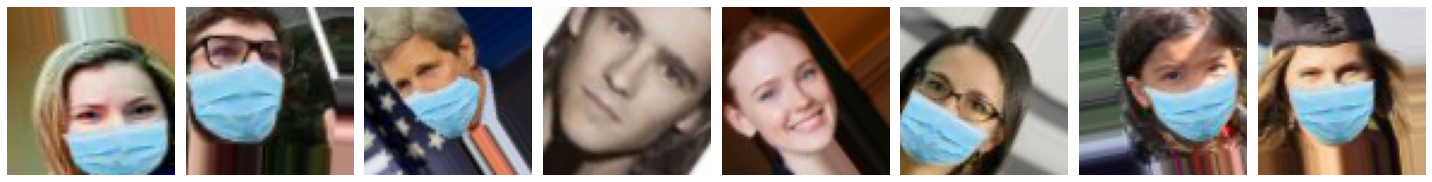

[0. 0. 0. 1. 1. 0. 0. 0.]


In [9]:
plotImages(imgs);
print(labels);

### **2. Build and train the CNN**

In [10]:
model = Sequential([
                    Conv2D(filters=32, kernel_size=(3,3),activation='relu',padding='same',input_shape=(70,70,3)),
                    MaxPool2D(pool_size=(2,2), strides=2),
                    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding= 'same'),
                    MaxPool2D(pool_size=(2,2), strides =2),
                    Flatten(),
                    Dense(units=64, activation= 'relu'),
                    #means the output is 0,1 (the labels) and the P(c=0) +P(c=1) = 1 
                    Dense(units=1, activation='sigmoid'), 

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 70, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 35, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 35, 35, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 17, 17, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),         
              loss='binary_crossentropy',                   
              metrics=['accuracy'])                        

In [12]:
history = model.fit(train_generator ,epochs = epochs,validation_data= validation_generator, batch_size= batch_size) 

Epoch 1/30
1002/1002 [==============================] - 97s 95ms/step - loss: 0.4487 - accuracy: 0.7806 - val_loss: 0.4283 - val_accuracy: 0.7957
Epoch 2/30
1002/1002 [==============================] - 93s 93ms/step - loss: 0.3136 - accuracy: 0.8669 - val_loss: 0.3593 - val_accuracy: 0.8422
Epoch 3/30
1002/1002 [==============================] - 90s 90ms/step - loss: 0.2563 - accuracy: 0.8945 - val_loss: 0.2887 - val_accuracy: 0.8786
Epoch 4/30
1002/1002 [==============================] - 93s 93ms/step - loss: 0.2187 - accuracy: 0.9156 - val_loss: 0.3244 - val_accuracy: 0.8651
Epoch 5/30
1002/1002 [==============================] - 101s 101ms/step - loss: 0.1890 - accuracy: 0.9290 - val_loss: 0.2287 - val_accuracy: 0.9111
Epoch 6/30
1002/1002 [==============================] - 98s 98ms/step - loss: 0.1772 - accuracy: 0.9341 - val_loss: 0.2388 - val_accuracy: 0.9071
Epoch 7/30
1002/1002 [==============================] - 92s 92ms/step - loss: 0.1533 - accuracy: 0.9445 - val_loss: 0.1662

### **3. Plotting the loss and accuracy of training vs validation**

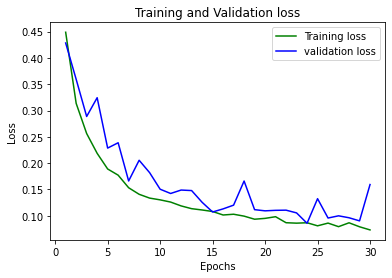

In [13]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochstoplot = range(1,epochs+1)
plt.plot(epochstoplot, loss_train, 'g', label='Training loss')
plt.plot(epochstoplot, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

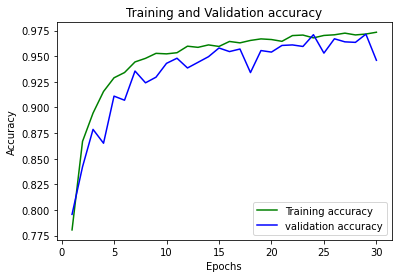

In [14]:
accur_train = history.history['accuracy']
accur_val = history.history['val_accuracy']
plt.plot(epochstoplot, accur_train, 'g', label='Training accuracy')
plt.plot(epochstoplot, accur_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **4. Testing the CNN model**

1/1 [==============================] - 0s 128ms/step


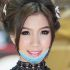



The person is not wearing a mask.

1/1 [==============================] - 0s 22ms/step


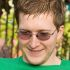



The person is not wearing a mask.

1/1 [==============================] - 0s 22ms/step


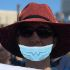



The person is not wearing a mask.

1/1 [==============================] - 0s 30ms/step


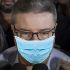



The person is wearing a mask. 

1/1 [==============================] - 0s 29ms/step


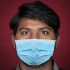



The person is wearing a mask. 

1/1 [==============================] - 0s 22ms/step


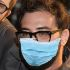



The person is wearing a mask. 

1/1 [==============================] - 0s 28ms/step


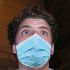



The person is wearing a mask. 

1/1 [==============================] - 0s 27ms/step


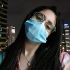



The person is wearing a mask. 

1/1 [==============================] - 0s 23ms/step


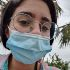



The person is wearing a mask. 

1/1 [==============================] - 0s 22ms/step


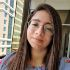



The person is not wearing a mask.

1/1 [==============================] - 0s 24ms/step


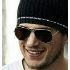



The person is not wearing a mask.

1/1 [==============================] - 0s 24ms/step


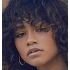



The person is not wearing a mask.

1/1 [==============================] - 0s 22ms/step


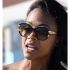



The person is not wearing a mask.

1/1 [==============================] - 0s 27ms/step


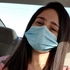



The person is wearing a mask. 

1/1 [==============================] - 0s 21ms/step


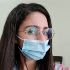



The person is wearing a mask. 



In [16]:
from IPython.display import Image, display
from tensorflow.keras.utils import img_to_array
TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
for i in range (1,16):
  img_directory = str(i) + '.jpg'
  img_data = tf.keras.utils.load_img(img_directory, target_size = (70, 70))   
  img_data = img_to_array(img_data)                            
  img_data = np.expand_dims(img_data, axis = 0)                     

  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  if(int(classify[0][0]) == 0):
    print(TGREEN + "The person is wearing a mask. \n")
  else:
    print(TRED + "The person is not wearing a mask.\n")